<a href="https://colab.research.google.com/github/englissi/englissi/blob/main/5_14_%EC%8B%A4%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Install necessary packages
- wordcloud: to generate a wordcloud
- matplotlib: to generate image files
- gradio: to implement our code as a - web-interface application
- gtts: text-to-audio
- nltk: natural language processing (word list)
- pyqrcode: to generate a QR code to share with the user

In [2]:
%%capture
!pip install wordcloud matplotlib gradio gtts nltk pyqrcode pypng

# Wordcloud

코드 실행하고, 생성된 입력창에 본문 붙이기



In [4]:
# Paste the story when the pop-up box appears
text=input()

The Cave of Whispers.  Once upon a time in the small town of Windale, two adventurous friends, Mary and John, stumbled upon an old map in John’s attic. The map was dusty and the edges were frayed, but it clearly marked a trail leading to the mysterious Cave of Whispers. It was said that anyone who ventured into the cave and uncovered its secrets would find the lost treasure of Captain Eldridge, a notorious pirate who had vanished without a trace.  Mary, with her wild, curly hair and eyes full of mischief, was the first to propose an adventure. “Imagine the stories we could tell if we found the treasure!” she exclaimed. John, more cautious but unable to resist a challenge, agreed. “Let’s prepare. We need flashlights, ropes, and maybe some sandwiches. Adventures are always better with sandwiches,” he said with a wink.  The next morning, armed with their backpacks and an unstoppable curiosity, Mary and John set out. They followed the map through the woods, over a bubbling creek, and along

- Word cloud generation 코드 실행하고, 파일확인하기

Title: The Cave of Whisper


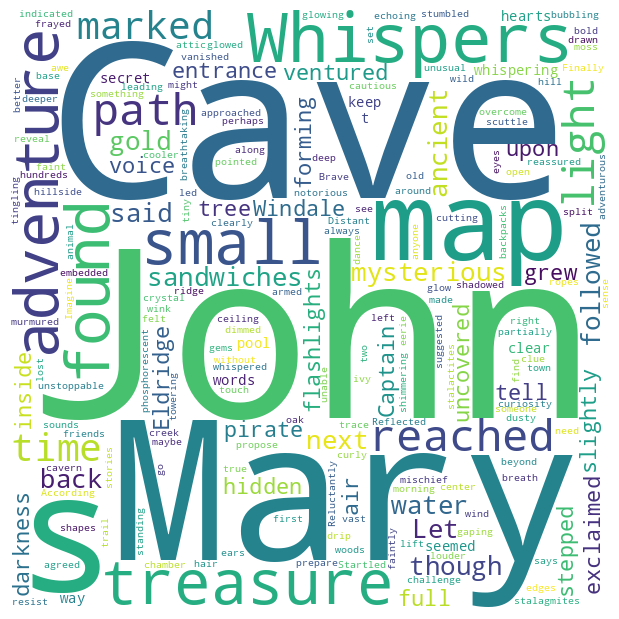

<Figure size 640x480 with 0 Axes>

In [5]:
#@markdown Word cloud generation
#!pip install wordcloud matplotlib

from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Generate word cloud

wordcloud = WordCloud(width = 600, height = 600,
                      background_color ='white',
                      min_font_size = 10).generate(text)

# Display the word cloud using matplotlib
plt.figure(figsize = (6, 6), facecolor = None) # e.g., facecolor = "gray"
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

print("Title: The Cave of Whisper")
plt.show()
plt.savefig('myimage.png')

# Listen to the story (video)

- 유튜브에서 비디오 가져오기

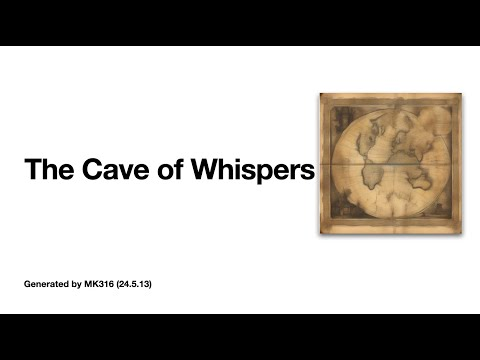

In [6]:
#@markdown Video to watch (from Youtube): Story video

from IPython.display import YouTubeVideo

YouTubeVideo('tGYsqxaLDlQ', width=600, height=400)  # This is an example video ID

# Learn vocabulary: Making a word list

- 자연어처리과정 실행하기 nltk # 삭제하고 실행해야 설치됨

In [11]:
!pip install nltk
# text = input()  # We'll use the same text here

# Step 1: Import necessary libraries
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
import re

# Step 2: Download necessary NLTK resources
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

- Making a wordlist by frequency (as 'df' dataframe)

In [12]:
#@markdown Making a wordlist by frequency (as 'df' dataframe)

# Step 3: Prepare the stop words 중지단어는 제거한다.
stop_words = set(stopwords.words('english'))

# Add more custom stop words 무시하고 싶은 단어 넣기
additional_stop_words = ['word1', 'word2']
stop_words.update(additional_stop_words)

# Step 4: Clean the text 공백 지우기, 기호지우기
# Use regular expressions to remove punctuation and numbers
clean_text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
clean_text = re.sub(r'\d+', '', clean_text)  # Remove numbers

# Step 5: Tokenize the text and remove stop words
words = word_tokenize(clean_text)
filtered_words = [word.lower() for word in words if word.lower() not in stop_words]

# print(clean_text)
# print("Filtered words: ", filtered_words)

# Step 6: Create frequency distribution
freq_dist = FreqDist(filtered_words)

# Step 7: Convert frequency distribution to a sorted list of tuples (word, frequency)

sorted_freq_list = sorted(freq_dist.items(), key=lambda x: x[1], reverse=True)

# # Display the sorted frequency list
# for word, frequency in sorted_freq_list:
#     print(f'{word}: {frequency}')

# Step 8: 저장단계 Convert frequency distribution to a DataFrame and a csv file

import pandas as pd

df = pd.DataFrame(sorted_freq_list, columns=['Word', 'Frequency'])

print(f"Number of words: {len(filtered_words)}")


Number of words: 365


왼쪽 파일 -> 폴더 -> 점3개 누르고 다운로드

In [13]:
# Step 9: Save the DataFrame to a CSV file

df.to_csv("wordlist.csv", index=False)

#허깅페이스에 업로드하기


# 단어목록으로 할 일

1) 발음연습어플

# 발음연습 어플 라이브러리 설치 과정

- Read-Aloud practice

In [14]:
%%capture
!pip install pandas gradio gtts

In [15]:
import pandas as pd

# Replace the URL with the direct link to the raw CSV file on GitHub 어휘목록 교체하면 됨
url = "https://raw.githubusercontent.com/MK316/Spring2024/main/Sample/wordstolearn.csv"
df = pd.read_csv(url)
df.head()

,Word,Frequency
0,cave,10
1,map,6
2,whispers,5
3,treasure,4
4,path,4


In [ ]:
# Section 1 🔵 Gradio implementation #1: Audio for selected words by the use Def로 정의

In [16]:
#@markdown Gradio app: display words to learn and generate audio of the user selected words

import pandas as pd
from gtts import gTTS
import gradio as gr
import os


def check_words(selected_words):
    phrase = "Let me say the words you selected: "
    phrase += ", ".join(f"Number {i + 1}. {word}" for i, word in enumerate(selected_words))

    tts = gTTS(text=phrase, lang='en')
    audio_path = 'selected_words.mp3'
    tts.save(audio_path)

    return audio_path

words = df['Word'].tolist()

iface = gr.Interface(
    fn=check_words,
    inputs=gr.components.CheckboxGroup(choices=words, label="Check the words you do not know how to pronounce:"),
    outputs=gr.Audio(label="Listen to the Pronunciation"),
    title="Learn to Pronounce",
    description="Check the words you are not sure how to pronounce and submit to listen to their pronunciation."
)

iface.launch()

Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://909f5f7d1fb8cfba81.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


In [17]:
# Section [2] 🔵 Gradio implementation #2: Audio for selected words by the use

# Load data (from your Github)
url = "https://raw.githubusercontent.com/MK316/Spring2024/main/Sample/wordstolearn.csv"
words = df['Word'].tolist()


In [18]:
#@markdown Gradio app for a single word pronunciation

import gradio as gr
import pandas as pd
from gtts import gTTS
import os


def check_word(word):
    if not os.path.exists('audio_files'):
        os.makedirs('audio_files')

    audio_path = f'audio_files/{word}.mp3'
    if not os.path.exists(audio_path):  # Generate file if it doesn't exist
        tts = gTTS(text=word, lang='en')
        tts.save(audio_path)

    return audio_path

iface = gr.Interface(
    fn=check_word,
    inputs=gr.Dropdown(choices=words, label="Select a word you do not know how to pronounce:"),
    outputs=gr.Audio(label="Listen to the Pronunciation"),
    title="Learn to Pronounce",
    description="Select a word and submit to listen to its pronunciation."
)

iface.launch()


Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://149bc4721005336ddf.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


In [19]:
# Section [3] 🔵 Read aloud practice? Sentence by sentence / 문장별로 끊어줌

%%capture
!pip install gradio gtts nltk pypng

In [20]:
# Predefined text
mytext = input()

The Cave of Whispers.  Once upon a time in the small town of Windale, two adventurous friends, Mary and John, stumbled upon an old map in John’s attic. The map was dusty and the edges were frayed, but it clearly marked a trail leading to the mysterious Cave of Whispers. It was said that anyone who ventured into the cave and uncovered its secrets would find the lost treasure of Captain Eldridge, a notorious pirate who had vanished without a trace.  Mary, with her wild, curly hair and eyes full of mischief, was the first to propose an adventure. “Imagine the stories we could tell if we found the treasure!” she exclaimed. John, more cautious but unable to resist a challenge, agreed. “Let’s prepare. We need flashlights, ropes, and maybe some sandwiches. Adventures are always better with sandwiches,” he said with a wink.  The next morning, armed with their backpacks and an unstoppable curiosity, Mary and John set out. They followed the map through the woods, over a bubbling creek, and along

In [21]:
#@markdown Gradio app for Read-Aloud practice (by sentences)
import gradio as gr
from gtts import gTTS
from nltk import tokenize
import os

# Import necessary nltk libraries
import nltk
nltk.download('punkt')


# Tokenize the predefined text into sentences
sentences = tokenize.sent_tokenize(mytext)

def generate_audio(selected_item):
    index_str = selected_item.split('.')[0]
    index = int(index_str) - 1  # Adjust for 0-based index

    if 0 <= index < len(sentences):
        sentence = sentences[index]
        tts = gTTS(text=sentence, lang='en')
        audio_path = f'sentence_{index + 1}.mp3'
        tts.save(audio_path)
        return audio_path
    else:
        return "Invalid sentence number"

# Gradio interface
iface = gr.Interface(
    fn=generate_audio,
    inputs=gr.Dropdown(choices=[f"{i + 1}. {s}" for i, s in enumerate(sentences)], label="Select Sentence"),
    outputs=gr.Audio(label="Audio of Selected Sentence"),
    title="Text to Audio by Sentence",
    description="Select a sentence number to hear it spoken."
)

iface.launch()


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://fb93f6ff028dc3197c.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


To share the live link with students, generate QR at my application or run the code below.

In [22]:
!pip install pypng

Paste the link: pypng in /usr/local/lib/python3.10/dist-packages (0.20220715.0)


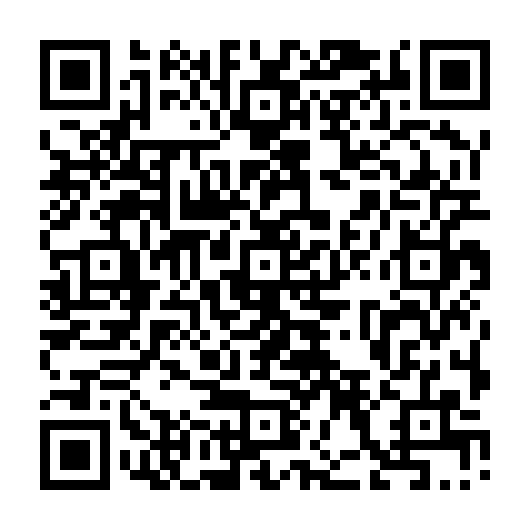

In [23]:
#@markdown Enter a link, save it as a png image file, and display
import pyqrcode
from IPython.display import Image, display

# Input for the link
s = input("Paste the link: ")

# Generate QR code
url = pyqrcode.create(s)

# Create and save the png file naming "myqr.png"
file_name = "myqrcode.png"
url.png(file_name, scale=10)

# Display the PNG file
def show_png(file):
    display(Image(file))

show_png(file_name)